<a href="https://colab.research.google.com/github/fjadidi2001/Machine_Learning_Journey/blob/main/Predict_ATP_tennis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> ATP stands for the Association of Tennis Professionals. It is the governing body for men's professional tennis worldwide. Founded in 1972, the ATP is responsible for organizing the ATP Tour, which includes a series of tournaments such as the ATP Masters 1000, ATP 500, and ATP 250 events, along with the prestigious ATP Finals and the Davis Cup.

> The ATP also ranks male players based on their performance in tournaments, creating the ATP Rankings, which reflect players' results over the previous 52 weeks. The ATP plays a significant role in promoting the sport, securing player rights, and managing tournament standards.




# Problem Statement:
> “Analyzing and Predicting Player Performance in Professional Tennis: An Exploration of Court-Type Specialization and Peak Performance Age”





## Project Objectives
1. **Exploratory Analysis of Player Characteristics**  
   - Analyze the distribution of player ages, rankings, and Elo ratings across different surfaces (hard court, clay court, grass court).
   - Identify trends in age and performance metrics to determine how they vary across court types.

2. **Court-Type Specialization Prediction**  
   - Build a classification model to predict a player's specialization (e.g., "hard-court specialist," "clay-court specialist," or "all-rounder") based on historical performance data.

3. **Peak Performance Prediction**  
   - Investigate the relationship between age and peak performance, specifically focusing on the "Peak Age" and "Peak Elo" features.
   - Use regression techniques to predict a player’s peak Elo rating and the age at which they will reach peak performance.

4. **Gender-Based Performance Analysis**  
   - Conduct a comparative analysis of performance metrics between male and female players, examining if and how gender influences court-type specialization and peak performance.

5. **Evaluation and Interpretability**  
   - Evaluate model performance using metrics such as accuracy, F1-score, mean squared error (MSE), etc., depending on the task (classification or regression).
   - Incorporate interpretability techniques (e.g., SHAP values or feature importance) to provide insights into the factors contributing to a player’s peak performance and specialization.




### Contribution and Impact
This project could provide valuable insights into tennis player development and training, helping coaches and analysts better understand the factors that contribute to a player’s success on different court types. It could also provide insights into the ideal age for peak performance, which is valuable for athlete management and career planning.

# Step 1: load the dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [5]:
import zipfile
import io

zip_file_name = 'archive.zip'
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall("./dataset")

In [6]:
import pandas as pd

csv_file_path = "./dataset/ATP.csv"
data = pd.read_csv(csv_file_path)

In [8]:
print(data.head(10))

               Player   Age     Elo HardRaw ClayRaw GrassRaw  \
0      Novak Djokovic  34.5  2185.2    2068  2016.3   1942.4   
1     Daniil Medvedev  25.9  2166.2  2095.3  1714.1   1723.4   
2    Alexander Zverev  24.7  2141.3  2056.7  1999.1   1671.4   
3       Roger Federer  39.9  2043.0  1936.7  1749.6   1813.4   
4      Carlos Alcaraz  18.5  2029.5  1906.3  1834.4   1441.4   
5  Stefanos Tsitsipas  23.4  2023.0    1882  2005.5   1543.4   
6         Casper Ruud  23.0  2010.2    1846  1951.2   1465.9   
7        Rafael Nadal  35.6  2007.5    1820  1951.2     1500   
8       Jannik Sinner  20.4  2006.1  1931.2    1807   1312.8   
9       Dominic Thiem  27.7  2002.1  1934.8  1936.2   1618.3   

   hard court elo rating  clay-court elo rating  grass-court elo rating  \
0                 2126.6                 2100.8                  2063.8   
1                 2130.7                 1940.1                  1944.8   
2                 2099.0                 2070.2                  1906.

## Explanation of Dataset Columns:

- Player: The name of the tennis player.
- Age: The player's current age in years (decimals represent partial years).
- Elo: The player's overall Elo rating, a measure of skill based on match outcomes.
- HardRaw: The raw Elo rating of the player on hard courts.
- ClayRaw: The raw Elo rating of the player on clay courts.
GrassRaw: The raw Elo rating of the player on grass courts.
- hard court elo rating: The adjusted Elo rating of the player on hard courts, which may include corrections or updates compared to HardRaw.
- clay-court elo rating: The adjusted Elo rating of the player on clay courts.
- grass-court elo rating: The adjusted Elo rating of the player on grass courts.
- Peak Match: The most notable match where the player reached their peak Elo rating.
- Peak Age: The age at which the player achieved their peak Elo rating.
- Peak Elo: The highest Elo rating achieved by the player in their career.
- Gender: The gender of the player (e.g., Male, Female).
- Rank: The player's current rank in the ATP (or WTA for women's tennis) standings.

# Step 2: EDA(Exploratory Data Analysis)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Display basic info about the dataset
print("Dataset Information:")
print(data.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Player                  783 non-null    object 
 1   Age                     783 non-null    float64
 2   Elo                     783 non-null    float64
 3   HardRaw                 783 non-null    object 
 4   ClayRaw                 783 non-null    object 
 5   GrassRaw                783 non-null    object 
 6   hard court elo rating   783 non-null    float64
 7   clay-court elo rating   783 non-null    float64
 8   grass-court elo rating  783 non-null    float64
 9   Peak Match              783 non-null    object 
 10  Peak Age                783 non-null    float64
 11  Peak Elo                783 non-null    float64
 12  Gender                  783 non-null    object 
 13  Rank                    783 non-null    int64  
dtypes: float64(7), int64(

In [12]:
print("\nBasic Statistics:")
print(data.describe())


Basic Statistics:
              Age          Elo  hard court elo rating  clay-court elo rating  \
count  783.000000   783.000000             783.000000             783.000000   
mean    26.654917  1563.584291            1515.014943            1509.160153   
std      4.722972   194.965341             192.315096             182.468047   
min     15.500000  1032.100000            1010.300000             970.300000   
25%     23.300000  1418.500000            1379.750000            1370.550000   
50%     26.300000  1549.300000            1494.900000            1500.800000   
75%     29.800000  1694.900000            1638.550000            1640.350000   
max     42.600000  2185.200000            2130.700000            2100.800000   

       grass-court elo rating    Peak Age     Peak Elo        Rank  
count              783.000000  783.000000   783.000000  783.000000  
mean              1489.050830   23.657088  1685.551724  196.275862  
std                146.718487    3.510809   204.40018

In [13]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Player                    0
Age                       0
Elo                       0
HardRaw                   0
ClayRaw                   0
GrassRaw                  0
hard court elo rating     0
clay-court elo rating     0
grass-court elo rating    0
Peak Match                0
Peak Age                  0
Peak Elo                  0
Gender                    0
Rank                      0
dtype: int64


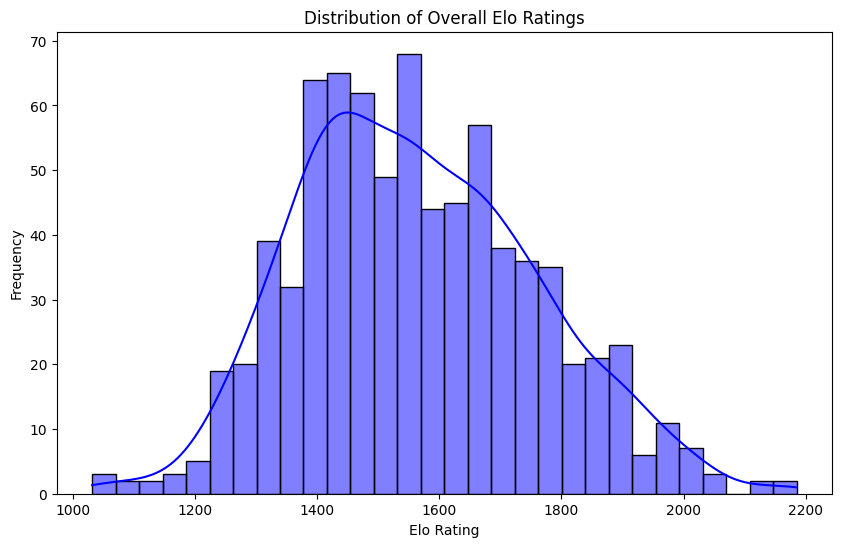

In [14]:
# Check the distribution of Elo ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['Elo'], kde=True, bins=30, color='blue')
plt.title('Distribution of Overall Elo Ratings')
plt.xlabel('Elo Rating')
plt.ylabel('Frequency')
plt.show()

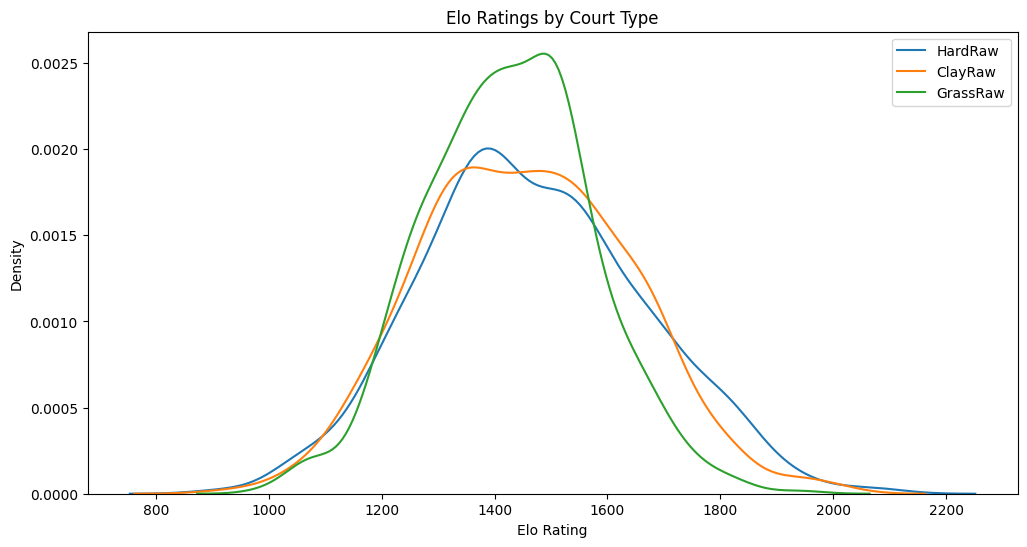

In [16]:
# Visualize Elo ratings by court type
court_types = ['HardRaw', 'ClayRaw', 'GrassRaw']
plt.figure(figsize=(12, 6))
for court in court_types:
    # Ensure the data is numeric before plotting
    numeric_data = pd.to_numeric(data[court], errors='coerce')  # Convert to numeric, handle errors
    sns.kdeplot(numeric_data.dropna(), label=court)  # Drop NaN values introduced by conversion
plt.title('Elo Ratings by Court Type')
plt.xlabel('Elo Rating')
plt.ylabel('Density')
plt.legend()
plt.show()

In [19]:
import numpy as np

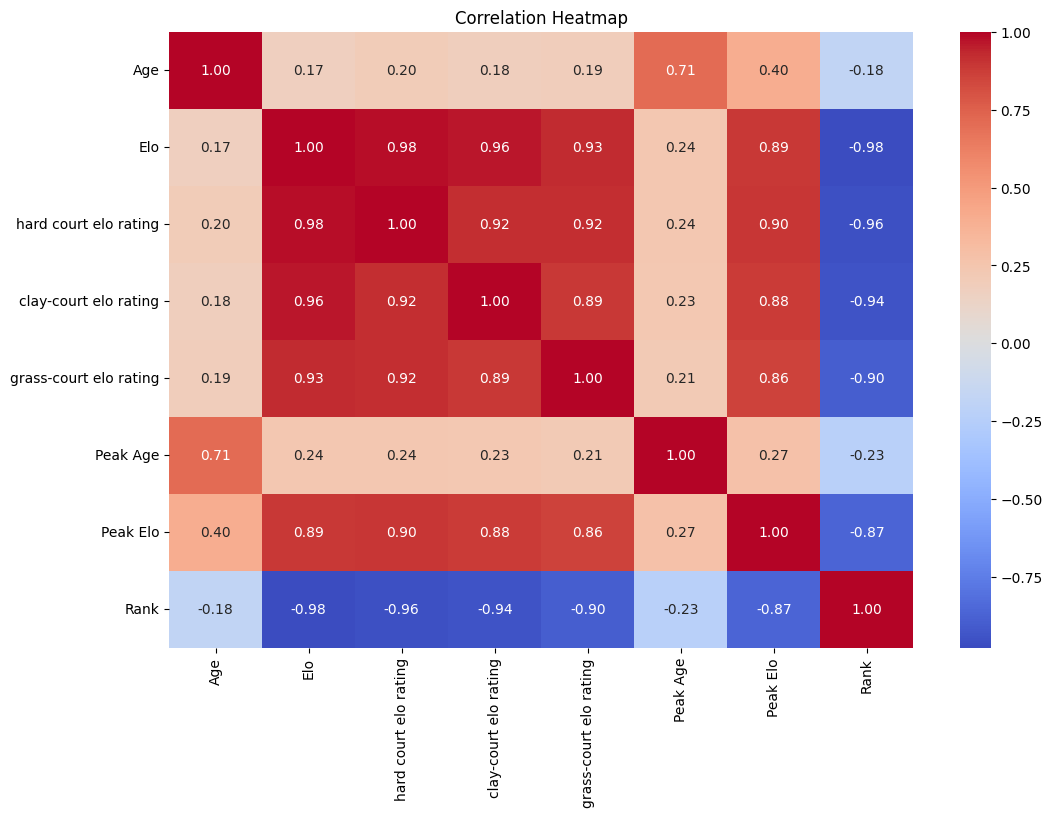

In [20]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=np.number)
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

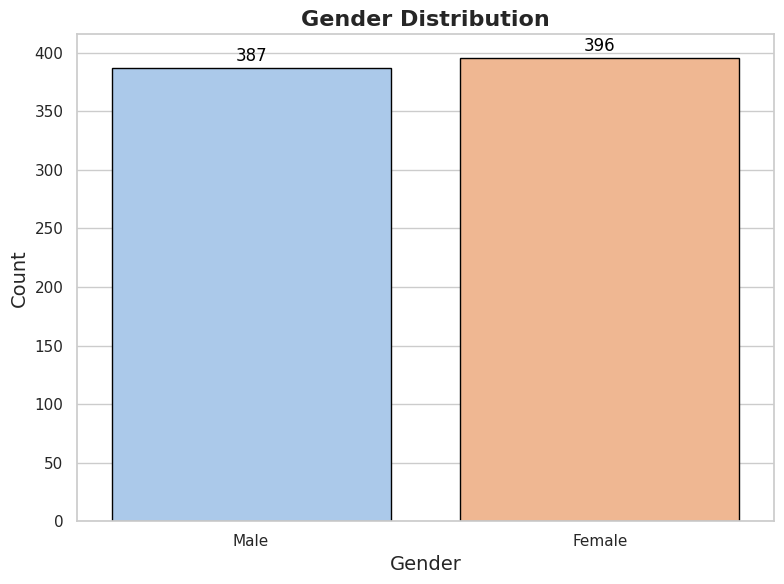

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and context for the plot
sns.set(style='whitegrid')  # Set the background style
plt.figure(figsize=(8, 6))  # Increase figure size for better visibility

# Draw the countplot with improved aesthetics
sns.countplot(x='Gender', data=data, hue='Gender', palette='pastel', edgecolor='black', legend=False)

# Adding title and labels with increased font sizes
plt.title('Gender Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Optionally, add value annotations above bars
for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='baseline',
                 fontsize=12, color='black',
                 xytext=(0, 5),
                 textcoords='offset points')

# Show the plot with a tight layout
plt.tight_layout()
plt.show()

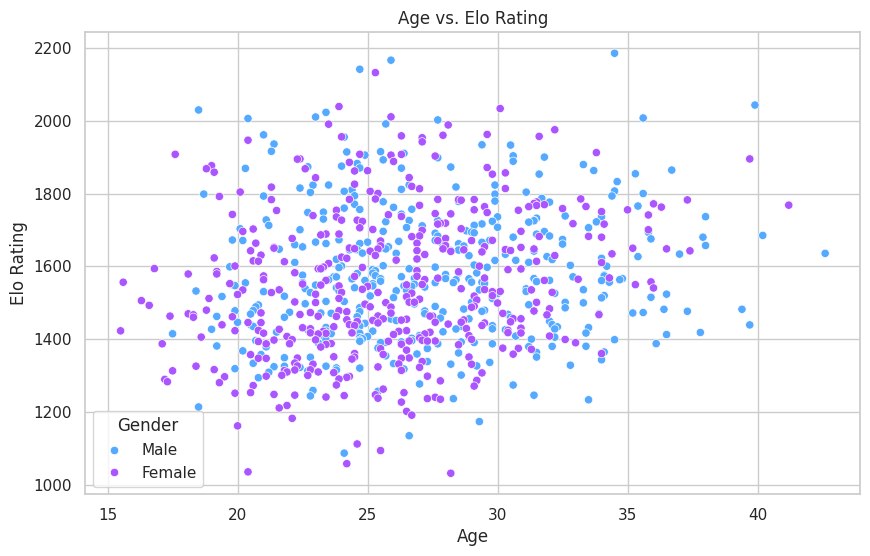

In [24]:
# Age vs Elo scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Elo', hue='Gender', data=data, palette='cool')
plt.title('Age vs. Elo Rating')
plt.xlabel('Age')
plt.ylabel('Elo Rating')
plt.show()

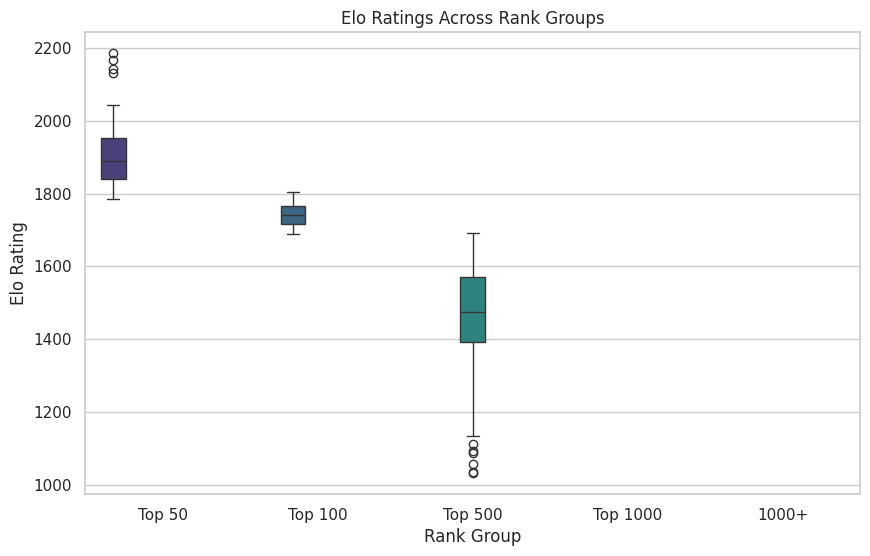

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create rank bins
bins = [0, 50, 100, 500, 1000, float('inf')]  # Use float('inf') to represent the maximum value
labels = ['Top 50', 'Top 100', 'Top 500', 'Top 1000', '1000+']
data['Rank_Binned'] = pd.cut(data['Rank'], bins=bins, labels=labels)

# Boxplot by binned ranks
plt.figure(figsize=(10, 6))
# Assign 'Rank_Binned' to 'hue' and set legend=False
sns.boxplot(x='Rank_Binned', y='Elo', data=data, hue='Rank_Binned', palette="viridis", legend=False)
plt.title('Elo Ratings Across Rank Groups')
plt.xlabel('Rank Group')
plt.ylabel('Elo Rating')
plt.show()

In [32]:
def classify_specialization(row):
    max_elo = max(row['HardRaw'], row['ClayRaw'], row['GrassRaw'])
    if max_elo == row['HardRaw']:
        return 'Hard-Court Specialist'
    elif max_elo == row['ClayRaw']:
        return 'Clay-Court Specialist'
    elif max_elo == row['GrassRaw']:
        return 'Grass-Court Specialist'
    else:
        return 'All-Rounder'  # For cases with similar performance

# Apply the function to create the target column
data['Specialization'] = data.apply(classify_specialization, axis=1)


In [36]:
data.head()

,Player,Age,Elo,HardRaw,ClayRaw,GrassRaw,hard court elo rating,clay-court elo rating,grass-court elo rating,Peak Match,Peak Age,Peak Elo,Gender,Rank,Rank_Binned,Specialization
0,Novak Djokovic,34.5,2185.2,2068,2016.3,1942.4,2126.6,2100.8,2063.8,2016 Miami F,28.8,2470.0,Male,1,Top 50,Hard-Court Specialist
1,Daniil Medvedev,25.9,2166.2,2095.3,1714.1,1723.4,2130.7,1940.1,1944.8,2022 Atp Cup RR,25.9,2175.1,Male,2,Top 50,Hard-Court Specialist
2,Alexander Zverev,24.7,2141.3,2056.7,1999.1,1671.4,2099.0,2070.2,1906.4,2022 Atp Cup RR,24.7,2157.9,Male,3,Top 50,Hard-Court Specialist
3,Roger Federer,39.9,2043.0,1936.7,1749.6,1813.4,1989.8,1896.3,1928.2,2007 Dubai F,25.6,2382.0,Male,4,Top 50,Hard-Court Specialist
4,Carlos Alcaraz,18.5,2029.5,1906.3,1834.4,1441.4,1967.9,1932.0,1735.5,2021 NextGen Finals F,18.5,2029.5,Male,5,Top 50,Hard-Court Specialist


<ipython-input-35-53db59adabc6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=specialization_counts.index, y=specialization_counts.values, palette='viridis')


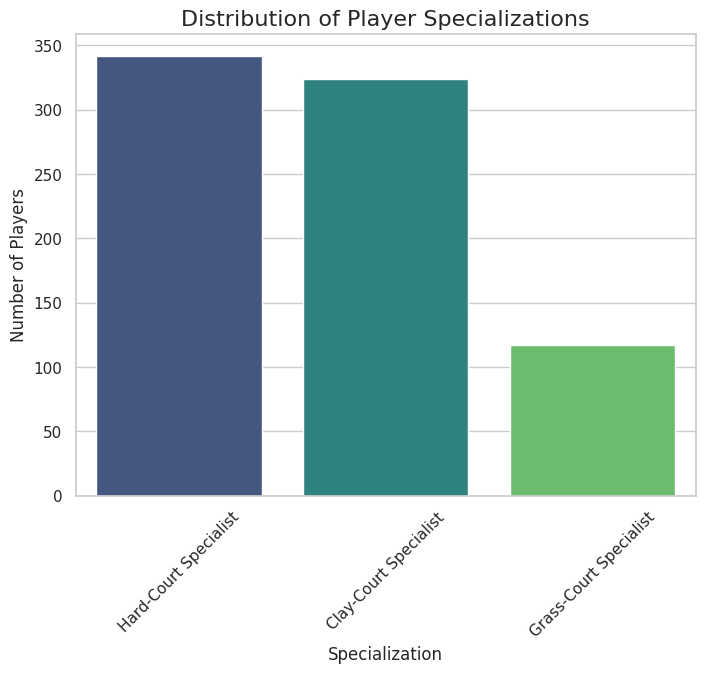

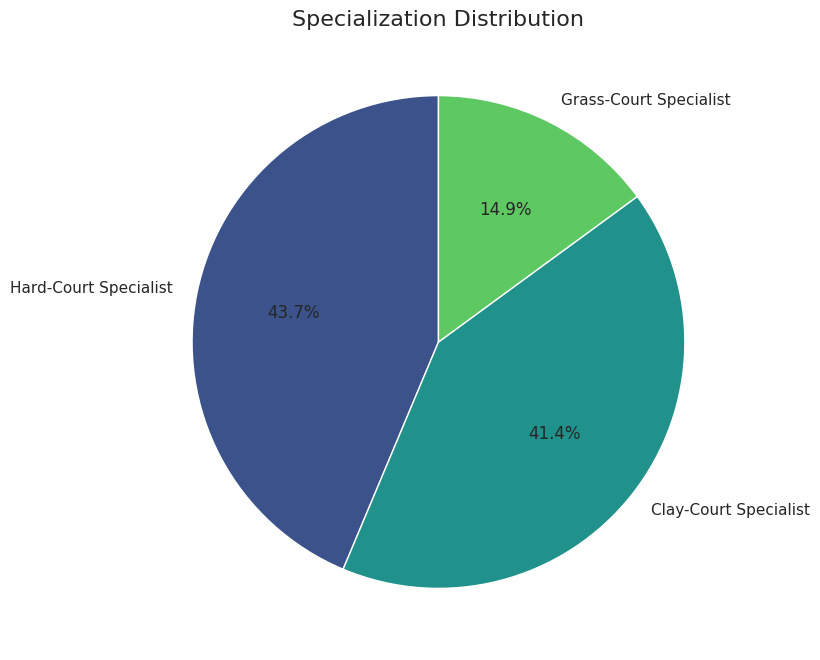

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of players in each specialization category
specialization_counts = data['Specialization'].value_counts()

# Bar Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=specialization_counts.index, y=specialization_counts.values, palette='viridis')
plt.title("Distribution of Player Specializations", fontsize=16)
plt.xlabel("Specialization", fontsize=12)
plt.ylabel("Number of Players", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(specialization_counts, labels=specialization_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(specialization_counts)))
plt.title("Specialization Distribution", fontsize=16)
plt.show()


# Step 3: Preprocessing

# Step 4: Split dataset

# Step 5: Train Model

# step 6: Evaluate the model utilizing multiple metrics